# **Manasa Holla**

#### Task #7 - Create a hybrid model for stock price/performance prediction
####               using numerical analysis of historical stock prices, and sentimental analysis of
####               news headlines

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
#web data reader is extension of pandas library to communicate with frequently updating data

In [40]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 12, 31)

df = web.DataReader("MSFT", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,155.372406
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,156.645950
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,156.932251
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.579727
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,155.688324


We have the data of Microsoft stocks of 19 years from January 2000 till December 2019.






We analyse stocks using two measurements- Rolling mean and Return rate.


Rolling Mean - Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.
In pandas

Moving Average- technical analysis tool that smooths out price data by creating a constantly updated average price.

In [41]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(50)

Date
1999-12-31   NaN
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
2000-01-10   NaN
2000-01-11   NaN
2000-01-12   NaN
2000-01-13   NaN
2000-01-14   NaN
2000-01-18   NaN
2000-01-19   NaN
2000-01-20   NaN
2000-01-21   NaN
2000-01-24   NaN
2000-01-25   NaN
2000-01-26   NaN
2000-01-27   NaN
2000-01-28   NaN
2000-01-31   NaN
2000-02-01   NaN
2000-02-02   NaN
2000-02-03   NaN
2000-02-04   NaN
2000-02-07   NaN
2000-02-08   NaN
2000-02-09   NaN
2000-02-10   NaN
2000-02-11   NaN
2000-02-14   NaN
2000-02-15   NaN
2000-02-16   NaN
2000-02-17   NaN
2000-02-18   NaN
2000-02-22   NaN
2000-02-23   NaN
2000-02-24   NaN
2000-02-25   NaN
2000-02-28   NaN
2000-02-29   NaN
2000-03-01   NaN
2000-03-02   NaN
2000-03-03   NaN
2000-03-06   NaN
2000-03-07   NaN
2000-03-08   NaN
2000-03-09   NaN
2000-03-10   NaN
2000-03-13   NaN
Name: Adj Close, dtype: float64

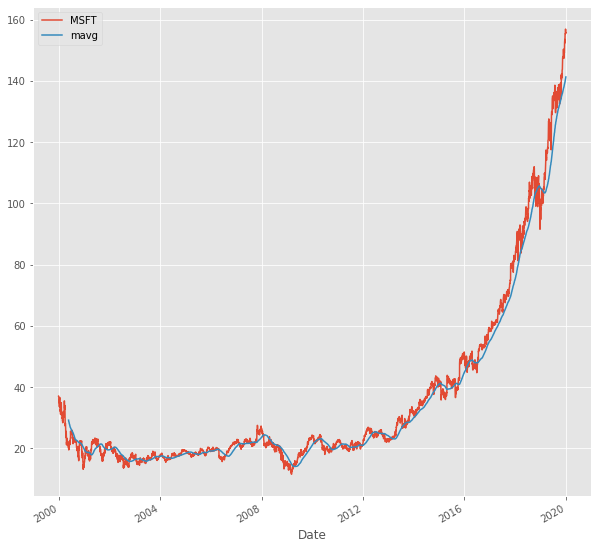

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#adjust the size of matplotlib
import matplotlib as npl
npl.rc('figure', figsize=(10,10))
npl.__version__

#adjust the style of matplotlib
style.use('ggplot')

close_px.plot(label = "MSFT")
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

**Return deviation - determine risk and return**

Expected return measures the expected value/mean of investment returns.
Expected return is calculated by multiplying the weights of each asset by expected and adding value value for each investment.

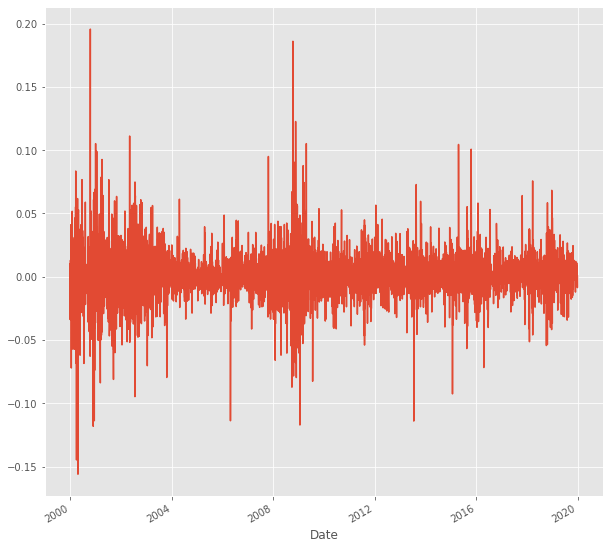

In [43]:
rets = close_px / close_px.shift(1)  - 1
rets.plot(label = 'return')
plt.show()

Analyze stocks of various IT giants like Microsoft, Apple, Amazon, Google ,IBM

In [44]:
dfcomp = web.DataReader(['MSFT' , 'AAPL' , 'AMZN' , 'GOOG' , 'IBM'], 'yahoo', start=start, end=end)['Adj Close']
dfcomp.head()

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
1999-12-31,37.076923,0.790705,76.1250,NaN,67.785484
2000-01-03,37.017384,0.860883,89.3750,NaN,72.891006
2000-01-04,35.766914,0.788302,81.9375,NaN,70.416786
2000-01-05,36.144032,0.799837,69.7500,NaN,72.891006
2000-01-06,34.933285,0.730621,65.5625,NaN,71.634270


Correlation analysis using correlation function in pandas

In [45]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.001606,0.088754,0.174056,NaN,0.075319
2000-01-04,-0.033781,-0.084310,-0.083217,NaN,-0.033944
2000-01-05,0.010544,0.014633,-0.148741,NaN,0.035137
2000-01-06,-0.033498,-0.086538,-0.060036,NaN,-0.017241
2000-01-07,0.013068,0.047369,0.061010,NaN,-0.004386
2000-01-10,0.007291,-0.017588,-0.005391,NaN,0.039648
2000-01-11,-0.025613,-0.051151,-0.035230,NaN,0.008474
2000-01-12,-0.032571,-0.059973,-0.047753,NaN,0.004202


using heat maps to visualize correlation range of various stocks

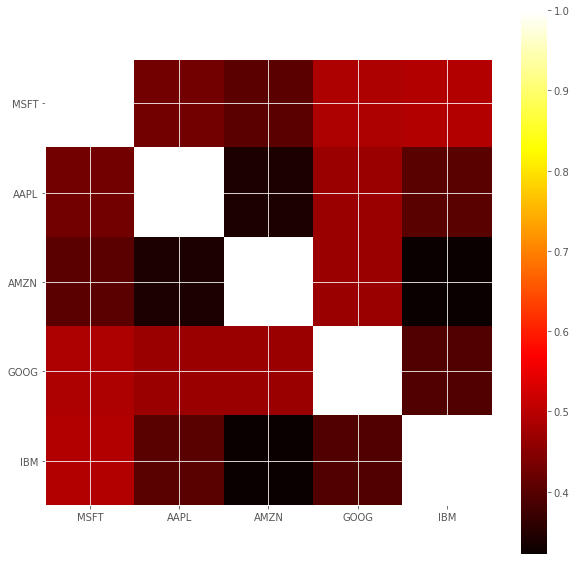

In [46]:
plt.imshow(corr, cmap = 'hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Stocks Return rate and Risk

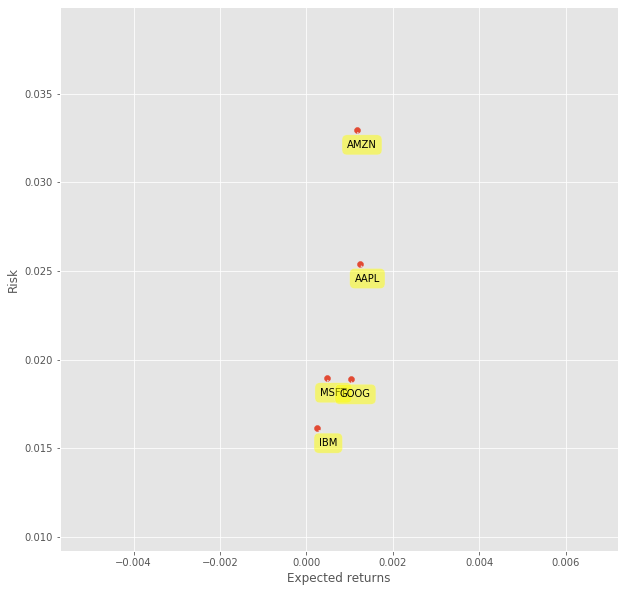

In [47]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(label, xy = (x, y), xytext = (20, -20),
               textcoords = 'offset points', ha = 'right', va = 'bottom',
               bbox = dict(boxstyle = 'round, pad = 0.5', fc  = 'yellow',
                           alpha = 0.5), arrowprops = dict(arrowstyle = '->',
                                                           connectionstyle = 'arc3,rad = 0'))

Importing News-Headlines files for numerical analysis

In [48]:
df1 = pd.read_csv('india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [49]:
df1.tail(10)

,publish_date,headline_category,headline_text
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [50]:
df1.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [51]:
df1.max()

publish_date                                                  20201231
headline_category                                          young-turks
headline_text        Why should girls have all the fun? Boys prep ...
dtype: object

In [52]:
df1.min()

publish_date                                20010102
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [53]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [54]:
#case of null values
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [55]:
df1.corr()

,publish_date
publish_date,1.0


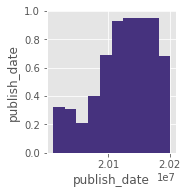

In [56]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [57]:
df1['headline_text'].value_counts()

Straight Answers                                              6723
Cartoons                                                      1536
Straight answers                                              1500
Photogallery                                                  1353
Your say                                                      1012
                                                              ... 
Uttarakhand CM admits lapses in disaster management              1
Prison authorities to organize marathon to feed the hungry       1
Now; Mormugao Port Trust to become multi-commodity port          1
Where is Srijit Mukherji these days?                             1
Tihar eyes e-tail route for products                             1
Name: headline_text, Length: 3168800, dtype: int64

In [58]:
df1['headline_category'].value_counts()

india                                           288541
unknown                                         209582
city.mumbai                                     134428
city.delhi                                      127717
business.india-business                         116761
                                                 ...  
advanis-us-visit                                     8
health-case-studies                                  8
entertainment.hindi.music.singer-of-the-week         8
sports.tennis.top-stories.tennis-atp                 8
indias-vision                                        8
Name: headline_category, Length: 1013, dtype: int64

EDA (Exploratry data analysis) using NLP and NLTK tools

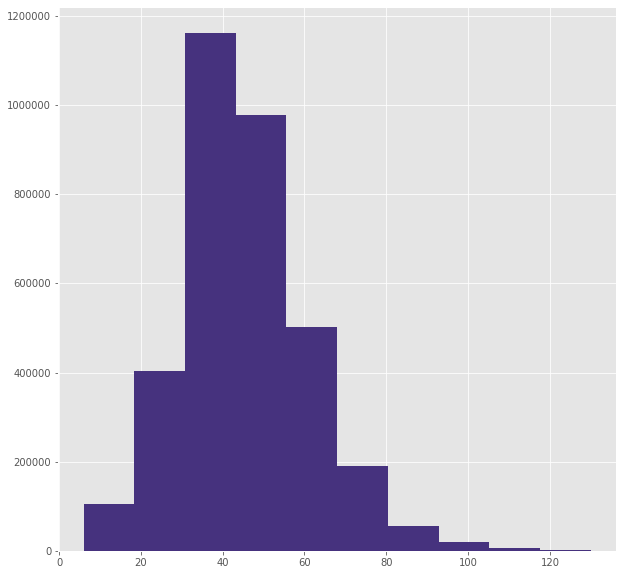

In [59]:
df1['headline_text'].str.len().hist()
plt.show()

Graph shows that news headlines range from 10 to 120 characters generally.

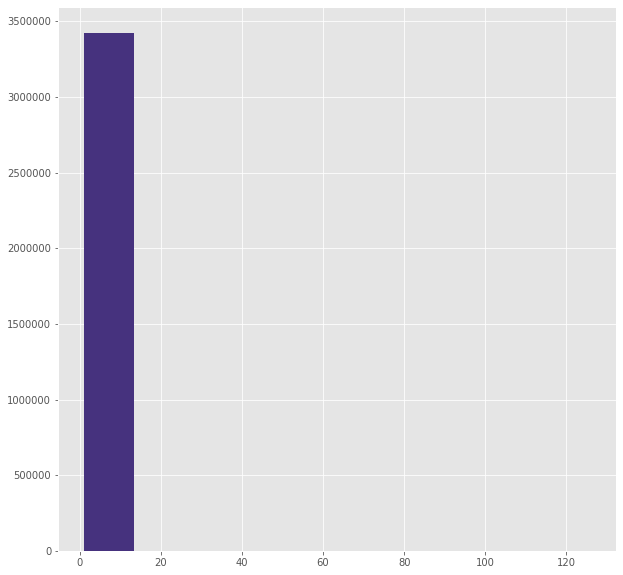

In [60]:
df1['headline_text'].str.split().\
  apply(lambda x : [len(i) for i in x]). \
  map(lambda x: np.mean(x)).hist()
plt.show()

The average word length ranges from 1 to 15

In [61]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meetc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

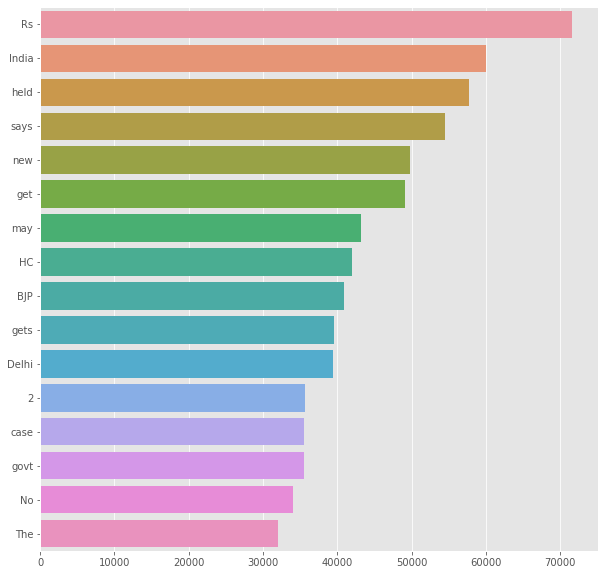

In [63]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

Ngram exploration

In [64]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','on','a','world','Tour'],2))

[('I', 'went'), ('went', 'on'), ('on', 'a'), ('a', 'world'), ('world', 'Tour')]

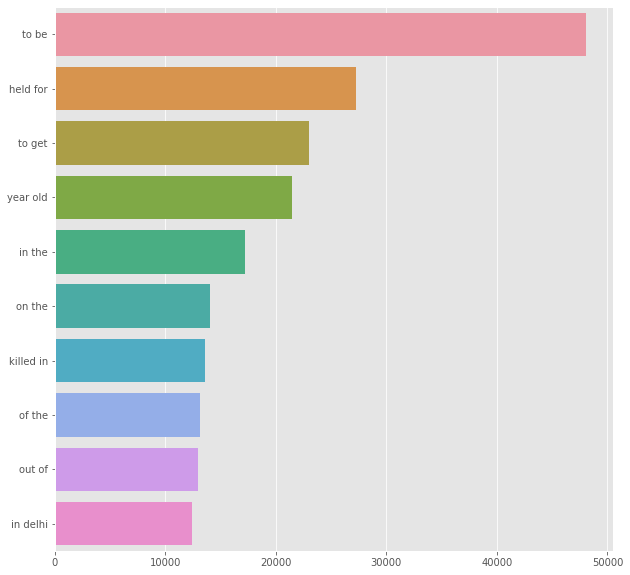

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

Using Textblob which is a python library for NLTK

In [66]:
from textblob import TextBlob
TextBlob('100 people killed in road accident').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

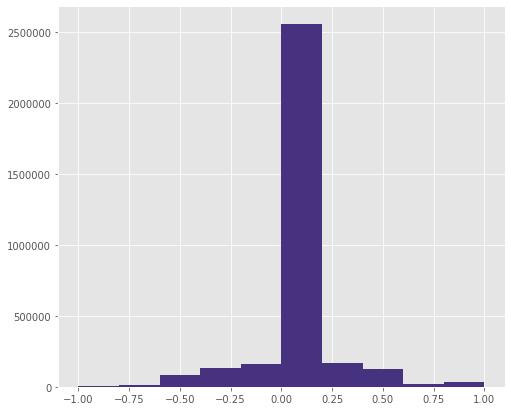

The graph indicates that majority of news headlines are neutral as polarity ranges between mainly 0.00 to 0.20

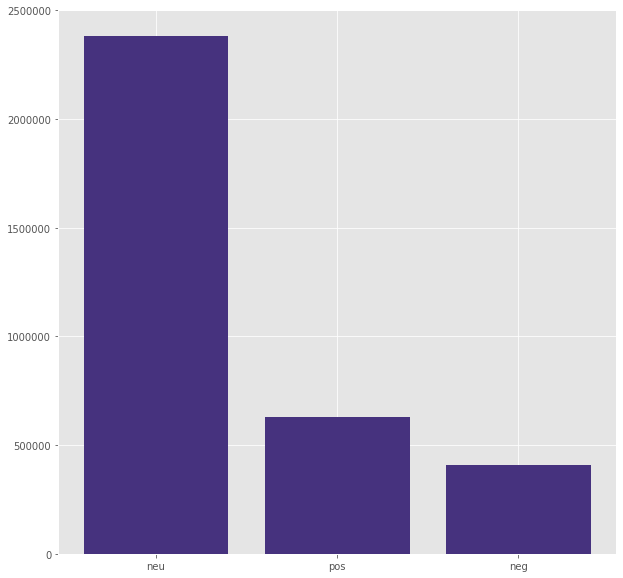

In [34]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

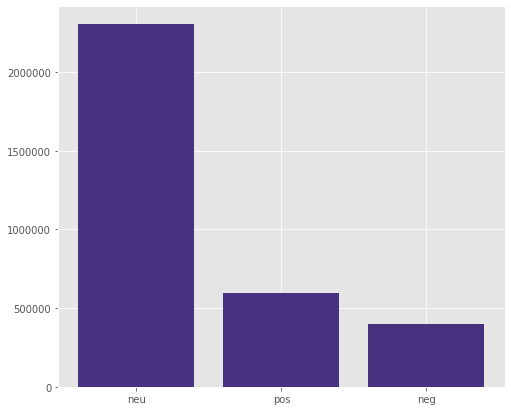

Graph shows that about 70% news is neutral, 20% news is positive and about 10% news is negative.